In [0]:
####
#PLEASE READ:
#1.)Each problem is marked with a comment header.
#2.)Each problem should be run in order.
#3.)I have tried to keep variables seperate but running a problem out of order or re-running after having run other problems may lead to issues.
#4.)Thank you for grading my work.


In [3]:
#Importing dependancies 
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
#Load Data
(x_train,y_train),(x_test,y_test) = mnist.load_data()
learningRate = .01

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#Defining general functions.
def sigmoid(x):
  return 1. / (1. + np.exp(-x))

def sigmoidDerivative(x):
  sig=sigmoid(x)
  return sig*(1. - sig)

def changeToBinary(label,num):
  labelCopy = np.array(label)
  for i in range(label.size):
    if(labelCopy[i] == num):
      labelCopy[i]=1
    else:
      labelCopy[i]=0 
  return labelCopy  

def softmax(x):
   return np.exp(x) / np.sum(np.exp(x), axis=0)

In [0]:
###########
#PROBLEM 1#
###########

def miniBatchSGDMeanSquared(x_train,y_train,epoch=10,batch=5,model=0):
  np.random.seed(20)
  
  numFeatures = int(x_train.size/784)
  #Flaten to a 2D array
  xFlat = (x_train.reshape(60000,784))
  yTrain = (y_train.reshape(60000,1))
  
  #normalize and add bias to features
  normFeatures = xFlat/255
  featuresBias = np.c_[np.ones((60000,1)),normFeatures]
  
  weights = np.random.randn(785,1)#785 pixels per image(28^2) +1 for bias
  weightsList = []
  
  #change labels to binary
  binaryLabels = changeToBinary(yTrain,model)

  for epoch in range(epoch):
    #Taken from Linear Regression class notebook by Paul Wocjan
    shuffledIndices = np.random.permutation(numFeatures)
    shuffledFeatures = featuresBias[shuffledIndices]
    shuffledLabels = binaryLabels[shuffledIndices]
    
    for i in range(0,numFeatures,batch):
      #Fetch random sample
      randomFeatures = shuffledFeatures[i:i+batch]
      randomLabels = shuffledLabels[i:i+batch]
      predictions = randomFeatures.dot(weights)
      gradient = randomFeatures.T.dot((sigmoid(predictions) - randomLabels) * sigmoidDerivative(predictions))
      weights = weights - (learningRate * gradient) 
    weightsList.append(weights)
  return weightsList


In [6]:
#Creating 10 binary models
from IPython.display import clear_output
digitModels = []
#Takes last model -- Could be improved to search for the best model
for digit in np.arange(10):
  clear_output()
  print(digit*10,"% Done")
  epochWeights = miniBatchSGDMeanSquared(x_train,y_train,epoch =300 , batch = 1000, model=digit)
  digitModels.append(epochWeights[-1])
clear_output()
print('Done')

Done


In [0]:
#Formatting feature data
modelsMSE = np.array(digitModels)
normXTestFlat = x_test.reshape(10000,784)/255
normXTestFlatBiased = np.c_[np.ones((10000,1)),normXTestFlat]

In [8]:
#Testing 10 binary models
counterMSE = 0
correctMSE = 0

for y in y_test:
  predictionMSE = []
  for i in np.arange(10):
    predictionMSE.append(sigmoid(normXTestFlatBiased[counterMSE].dot(modelsMSE[i])))
  predictionCE = np.argmax(predictionMSE)
  if(predictionCE == y):
    correctMSE += 1
  counterMSE += 1

print(correctMSE/10000,'% Accuracy')

0.752 % Accuracy


In [0]:
###########
#PROBLEM 2#
###########

def miniBatchSGDCrossEntropy(x_train,y_train,epoch=10,batch=5,model=0):
  np.random.seed(20)
  
  numFeatures = int(x_train.size/784)
  #Flaten to a 2D array
  xFlat = (x_train.reshape(60000,784))
  yTrain = (y_train.reshape(60000,1))
  
  #normalize and add bias to features
  normFeatures = xFlat/255
  featuresBias = np.c_[np.ones((60000,1)),normFeatures]
  
  weights = np.random.randn(785,1)#785 pixels per image(28^2) +1 for bias
  weightsList = []
  
  #change labels to binary
  binaryLabels = changeToBinary(yTrain,model)

  for epoch in range(epoch):
    #Taken from Linear Regression class notebook by Paul Wocjan
    shuffledIndices = np.random.permutation(numFeatures)
    shuffledFeatures = featuresBias[shuffledIndices]
    shuffledLabels = binaryLabels[shuffledIndices]
    
    for i in range(0,numFeatures,batch):
      #Fetch random sample
      randomFeatures = shuffledFeatures[i:i+batch]
      randomLabels = shuffledLabels[i:i+batch]
      predictions = randomFeatures.dot(weights)
      gradient = randomFeatures.T.dot((sigmoid(predictions) - randomLabels))
      weights = weights - (learningRate * gradient) 
    weightsList.append(weights)
  return weightsList

In [10]:
#Creating 10 binary models
digitModelsCE = []
#Takes last model -- Could be improved to search for the best model
for digit in np.arange(10):
  clear_output()
  print(digit*10,"% Done")
  epochWeights = miniBatchSGDCrossEntropy(x_train,y_train,epoch =300 , batch = 1000, model=digit)
  digitModelsCE.append(epochWeights[-1])
clear_output()
print('Done')

Done


In [0]:
#Formatting feature data
modelsCE = np.array(digitModelsCE)
normXTestFlat = x_test.reshape(10000,784)/255
normXTestFlatBiased = np.c_[np.ones((10000,1)),normXTestFlat]

In [12]:
#Testing 10 binary models
counterCE = 0
correctCE = 0

for y in y_test:
  predictionCE = []
  for i in np.arange(10):
    predictionCE.append(sigmoid(normXTestFlatBiased[counterCE].dot(modelsCE[i])))
  predictionCE = np.argmax(predictionCE)
  if(predictionCE == y):
    correctCE += 1
  counterCE += 1

print(correctCE/10000,'% Accuracy')

0.8835 % Accuracy


In [0]:
###########
#PROBLEM 3#
###########

#Vectorizes labels 
def scalarToVector(labels):
  vectorizedLabels = []
  for scalar in labels:
    vector = np.zeros((10,1))
    vector[scalar]=1
    vectorizedLabels.append(vector)
  return np.array(vectorizedLabels).reshape((len(labels),10))    
                         

In [0]:
def classifier(x_train, y_train, epoch = 50, batch = 50):
  np.random.seed(20)
  
  numFeatures = int(x_train.size/784)
  
  #Flaten to a 2D array
  xFlat = (x_train.reshape(60000,784))
  
  #Vectorize the lables
  yTrain = scalarToVector(y_train)
  
  #normalize and add bias to features
  normFeatures = xFlat/255
  featuresBias = np.c_[np.ones((60000,1)),normFeatures]
  weights = np.random.randn(785,10)#785 pixels per image(28^2) +1 for bias
  weightsList = []

  for epoch in range(epoch):
    #Taken from Linear Regression class notebook by Paul Wocjan
    shuffledIndices = np.random.permutation(numFeatures)
    shuffledFeatures = featuresBias[shuffledIndices]
    shuffledLabels = yTrain[shuffledIndices]
    
    for i in range(0,numFeatures,batch):
      #Fetch random sample
      randomFeatures = shuffledFeatures[i:i+batch]
      randomLabels = shuffledLabels[i:i+batch]
      predictions = randomFeatures.dot(weights)
      gradient = randomFeatures.T.dot((sigmoid(predictions) - randomLabels))
      weights = weights - (learningRate * gradient) 
    weightsList.append(weights)
  return weightsList

In [0]:
#Train classifier
classifierWeights = classifier(x_train,y_train)

In [0]:
#Flattening Features
normXTestFlat = x_test.reshape(10000,784)/255
normXTestFlatBiased = np.c_[np.ones((10000,1)),normXTestFlat]

In [0]:
#Test Accuracy of classifier
percentageList = []
max = 0
for weights in classifierWeights:
  classifierCorrect = 0
  for i in np.arange(10000):
    prediction = normXTestFlatBiased[i].dot(weights)
    if(np.argmax(softmax(prediction)) == y_test[i]):
       classifierCorrect += 1
  percent = classifierCorrect/10000
  percentageList.append(percent)
  if(percent > max): max = percent
  

Max Percentage:  0.9191
Final Percentage:  0.9167


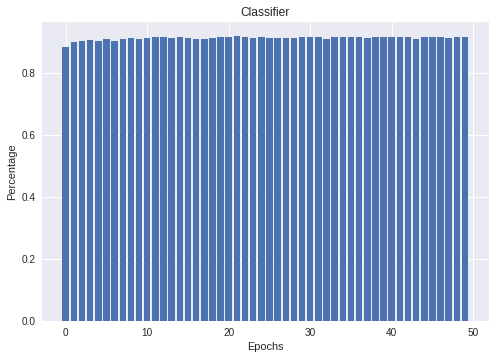

In [18]:
#charting percentages
print('Max Percentage: ',max)
print('Final Percentage: ',percentageList[-1])
plt.bar(np.arange(len(classifierWeights)),percentageList)
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.title('Classifier')
plt.show()

In [19]:
###########
#PROBLEM 4#
###########

#Importing Keras
from keras.models import Sequential
from keras.layers import Dense

#Creating Model
kerasClassifier = Sequential()
kerasClassifier.add(Dense(units = 784,activation = 'sigmoid', input_shape = (784,)))
kerasClassifier.add(Dense(units = 10,activation = 'softmax'))



Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Specifying parameters for the model
kerasClassifier.compile(loss="categorical_crossentropy",
                       optimizer="sgd",
                       metrics =['accuracy'])

In [0]:
#Shaping data
xTrain = x_train.reshape(60000,784)
yTrain = scalarToVector(y_train)

In [22]:
#Fitting model to data
kerasClassifier.fit(xTrain,yTrain,epochs=100,batch_size=1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60000/60000 [==============================] - 4s 63us/step - loss: 1.4169 - acc: 0.5974
Epoch 2/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.7527 - acc: 0.8266
Epoch 3/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.5801 - acc: 0.8631
Epoch 4/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.4956 - acc: 0.8805
Epoch 5/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.4435 - acc: 0.8922
Epoch 6/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.4071 - acc: 0.8999
Epoch 7/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.3798 - acc: 0.9058
Epoch 8/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.3582 - acc: 0.9110
Epoch 9/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.3405 - acc: 0.9154
Epoch 10/100
60000/60000 [=================

In [0]:
#Shaping test data
xTest = x_test.reshape(10000,784)
yTest = scalarToVector(y_test)

In [24]:
#Evaluating classifier
loss,acc = kerasClassifier.evaluate(xTest,yTest)
print(acc*100,'% Accuracy')

10000/10000 [==============================] - 1s 55us/step
94.0 % Accuracy


In [0]:
###########
#PROBLEM 5#
###########

#Divides pixels into black or white
def blackOrWhite(pixel):
  if(pixel>127):
    newPixel = 1
  else:
    newPixel = 0 
  return newPixel

#Finds the next white pixel
def findWhitePixel(image):
  rowCount,colCount = image.shape
  rowCount = np.arange(rowCount)
  colCount = np.arange(colCount)
  for i in rowCount:
    for j in colCount:
      if(image[i][j] == 0):return (i,j)
  return (-1,-1)

#checks the bounds on an image
def boundCheck(x,y,size):
  if(x<0 or x>=size):
    return False
  if(y<0 or y>=size):
    return False
  return True

#does the recursive floodfill
def helper(image,x,y):
  size=28
  image[x][y] = 1
  if(boundCheck(x+1,y,size) and image[x+1][y]==0):
    image = helper(image,x+1,y)
  if(boundCheck(x,y+1,size) and image[x][y+1]==0):
    image = helper(image,x,y+1)
  if(boundCheck(x-1,y,size) and image[x-1][y]==0):
    image = helper(image,x-1,y)
  if(boundCheck(x,y-1,size) and image[x][y-1]==0):
    image = helper(image,x,y-1)
  return image

#main body of floodfill
def floodFill(image):
  x,y = findWhitePixel(image)
  if(x==-1):
    return 0
  else:
    image = helper(image,x,y)
    return 1 + floodFill(image)

#Gets number of white areas in set of images for each image
def numberOfWhiteAreas(images):
  numWhiteSpaces = []
  numImages = int(images.size/784)
  for i in np.arange(numImages):
    if(i%1000 == 0):
      clear_output()
      print(i/numImages*100,'% Done')
    numWhiteSpaces.append(floodFill(images[i]))
  clear_output()
  print('Done')  
  return np.array(numWhiteSpaces)

#Checks averages of rows to see if there is a pixel
def getDimensions(image):
  tImage = image.T
  iMin = -1
  tMin = -1
  iMax = -1
  tMax = -1
  for i in np.arange(28):
    #Check for height
    if(iMin==-1):
      if(np.mean(image[i])!=0):
        iMin=i
    elif(iMax==-1):
      if(np.mean(image[i])==0):
        iMax=i
    #Check for width
    if(tMin==-1):
      if(np.mean(tImage[i])!=0):
        tMin=i
    elif(tMax==-1):
      if(np.mean(tImage[i])==0):
        tMax=i
  return (iMax-iMin,tMax-tMin)  

#Gets height and width for an image
def dimensionsOfDigit(images):
  widths = []
  heights = []
  numImages = int(images.size/784)
  for i in np.arange(numImages):
    if(i%1000 == 0):
      clear_output()
      print(i/numImages*100,'% Done')
    height,width = getDimensions(images[i])
    heights.append(height)
    widths.append(width)
  clear_output()
  print("Done")
  return np.array(heights),np.array(widths)
      

In [0]:
#Creating Black and White Images
vectorBW = np.vectorize(blackOrWhite)
bWImages = vectorBW(x_train)

In [27]:
#Finding number of white areas in each image
tempImages = np.copy(bWImages)
areasTrain = numberOfWhiteAreas(tempImages)


Done


In [28]:
#Finding height and width of Images
tempImages = np.copy(bWImages)
height,width = dimensionsOfDigit(tempImages)

Done


In [0]:
#Reshaping
areasTrain = areasTrain.reshape(60000,1)
xTrain = x_train.reshape(60000,784)
yTrain = scalarToVector(y_train)
#Normalizing 
areasTrainNorm = areasTrain/3
height = height/28
width = width/28
#Concatinating data for classifier
xTrainWithAreas = np.c_[height,width,areasTrainNorm,xTrain]

In [30]:
# Recreating the Classifier with areas,height and width
kerasClassifierWithAreas = Sequential()

kerasClassifierWithAreas.add(Dense(units = 785,activation = 'sigmoid', input_shape = (787,)))
kerasClassifierWithAreas.add(Dense(units = 10,activation = 'softmax'))
kerasClassifierWithAreas.compile(loss="categorical_crossentropy",
                       optimizer="sgd",
                       metrics =['accuracy'])

kerasClassifierWithAreas.fit(xTrainWithAreas,yTrain,epochs=100,batch_size=1000)

Epoch 1/100
60000/60000 [==============================] - 4s 59us/step - loss: 1.3940 - acc: 0.6141
Epoch 2/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.7293 - acc: 0.8348
Epoch 3/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.5672 - acc: 0.8674
Epoch 4/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.4869 - acc: 0.8827
Epoch 5/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.4371 - acc: 0.8934
Epoch 6/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.4021 - acc: 0.8995
Epoch 7/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.3757 - acc: 0.9055
Epoch 8/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.3544 - acc: 0.9104
Epoch 9/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.3369 - acc: 0.9140
Epoch 10/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.3222 - a

In [31]:
#Find white areas of test images
bWTestImages = vectorBW(x_test)
tempTestImages = np.copy(bWTestImages)
areasTest = numberOfWhiteAreas(tempTestImages)

Done


In [32]:
#Find height and width of test images
tempTestImages = np.copy(bWTestImages)
height,width = dimensionsOfDigit(tempTestImages)

Done


In [0]:
#append areas,height,width to test data
xTest = x_test.reshape(10000,784)
yTest = scalarToVector(y_test)

areasTest = areasTest.reshape(10000,1)
areasTestNorm = areasTest/3
height = height/28
width = width/28
xTest = x_test.reshape(10000,784)
xTestWithAreas = np.c_[height,width,areasTestNorm,xTest]

In [34]:
#Evaluating accuracy after adding extra features
loss,acc = kerasClassifierWithAreas.evaluate(xTestWithAreas,yTest)
print(acc*100,'% Accuracy')

10000/10000 [==============================] - 1s 51us/step
94.04 % Accuracy


In [0]:
#End